# **Data Understanding**

Data Understanding adalah tahap awal proyek untuk memahami data yang dimiliki. Supaya isi dataset lebih mudah dipahami, lakukan proses loading data terlebih dahulu. Jangan lupa import semua library yang dibutuhkan dalam pembuatan model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Machine Learning 4/Google Play Store Apps.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Machine Learning 4/Google Play Store Apps.zip
  inflating: googleplaystore.csv     
  inflating: googleplaystore_user_reviews.csv  
  inflating: license.txt             


Perhatikanlah, terdapat 1 file license.txt dan 2 file csv, yaitu:
- googleplaystore.csv     
- googleplaystore_user_reviews.csv

Adapun dataset yang digunakan dalam proyek ini yaitu googleplaystore.csv. Muat data untuk melihat sampel data.

In [4]:
url = '/content/drive/MyDrive/Colab Notebooks/Machine Learning 4/Google Play Store Apps/googleplaystore.csv'
googleplaystore = pd.read_csv(url)
googleplaystore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
googleplaystore.shape

(10841, 13)

Output kode di atas memberikan informasi sebagai berikut:
- Ada 10841 entri dalam dataset.
- Terdapat 13 fitur yaitu: App,	Category,	Rating,	Reviews,	Size,	Installs,	Type,	Price,	Content Rating,	Genres,	Last Updated,	Current Ver,	Android Ver

## Deskripsi Variabel

Variabel-variabel pada Google Play Store dataset adalah
- App                  : nama aplikasi
- Category             : kategori aplikasi
- Rating               : penilaian pengguna dari aplikasi (dalam satuan bintang 1-5)
- Reviews              : jumlah pengguna yang memberikan ulasan pada aplikasi tersebut (dalam satuan buah)
- Size                 : ukuran dari aplikasi (dalam satuan byte)
- Installs             : jumlah pengguna yang meng-install aplikasi
- Type                 : tipe aplikasi (dalam kategori Paid/berbayar atau Free/gratis)
- Price                : harga dari aplikasi (dalam satuan dollar USD)
- Content Rating       : kategori usia penggunaan untuk aplikasi (Everyone, Mature 17+, dst)
- Genres               : kategori dari genre aplikasi (Medical, Lifestyle, dst)
- Last Updated         : tanggal terakhir aplikasi di perbaharui oleh pengembang aplikasi
- Current Ver          : versi terkini dari aplikasi
- Android Ver          : versi android minimum yang dipersyaratkan untuk meng-install aplikasi

Selanjutnya eksplorasi dataset

In [6]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Dari output terlihat bahwa:
- Terdapat 12 kolom dengan tipe object, yaitu: App,	Category,	Reviews,	Size,	Installs,	Type,	Price,	Content Rating,	Genres,	Last Updated,	Current Ver,	Android Ver. Kolom ini merupakan categorical features.
- Terdapat 1 kolom numerik dengan tipe data float64 yaitu: Rating.

Jika ingin membangun sistem rekomendasi yang lebih kompleks, semua fitur-fitur pada dataset perlu digunakan pada model. Namun, pada proyek ini, hanya digunakan fitur App, Category dan Rating untuk membuat model sistem rekomendasi sederhana.

Pada pembuatan model dengan Content Based Filtering nanti, data yang dibutuhkan adalah nama App dan Category. Sedangkan pada Collaborative Filtering, data yang dibutuhkan adalah nama App dan Rating.

Selanjutnya, gunakan fungsi unique() untuk melihat ada berapa banyak entri yang unik berdasarkan App, Category dan Rating.

In [7]:
print('Banyak data App: ', len(googleplaystore.App.unique()))
print('Banyak data Category: ', len(googleplaystore.Category.unique()))
print('Banyak data Rating: ', len(googleplaystore.Rating.unique()))

Banyak data App:  9660
Banyak data Category:  34
Banyak data Rating:  41


Terdapat 966 nama aplikasi dengan 34 kategori dan 41 variasi nilai rating dari total 10841 entri.

## **Exploratory Data Analysis**

Untuk memahami data lebih lanjut, dilakukan Analisis Univariat dan Visualisasi Data

Pertama, bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [8]:
categorical_features = ['App', 'Category']
numerical_features = ['Rating']

a. Data Kategori

In [9]:
feature = categorical_features[1]
count = googleplaystore[feature].value_counts()
percent = 100*googleplaystore[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)

                     Jumlah sampel  Persentase
FAMILY                        1972        18.2
GAME                          1144        10.6
TOOLS                          843         7.8
MEDICAL                        463         4.3
BUSINESS                       460         4.2
PRODUCTIVITY                   424         3.9
PERSONALIZATION                392         3.6
COMMUNICATION                  387         3.6
SPORTS                         384         3.5
LIFESTYLE                      382         3.5
FINANCE                        366         3.4
HEALTH_AND_FITNESS             341         3.1
PHOTOGRAPHY                    335         3.1
SOCIAL                         295         2.7
NEWS_AND_MAGAZINES             283         2.6
SHOPPING                       260         2.4
TRAVEL_AND_LOCAL               258         2.4
DATING                         234         2.2
BOOKS_AND_REFERENCE            231         2.1
VIDEO_PLAYERS                  175         1.6
EDUCATION    

Berikut merupakan persebaran data Category dengan visualiasi bar plot

<Axes: title={'center': 'Category'}>

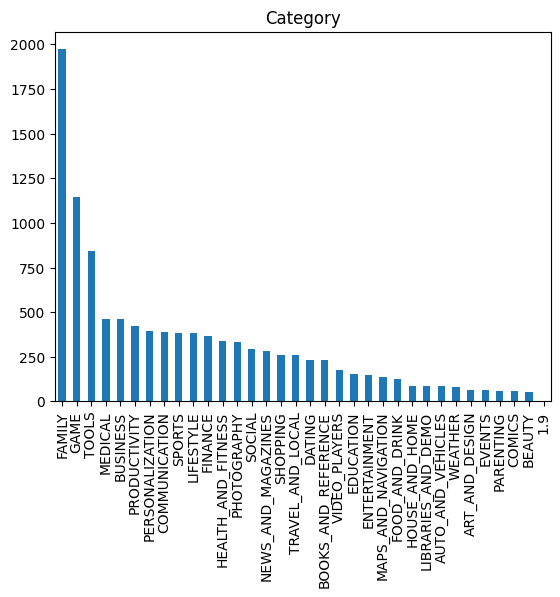

In [10]:
count.plot(kind='bar', title=feature)

Untuk eksplorasi lebih lanjut, bisa divisualisasikan fitur kategorik lainnya.

b. Data Numerik

Buat histogram untuk data numerik dengan menggunakan hist()

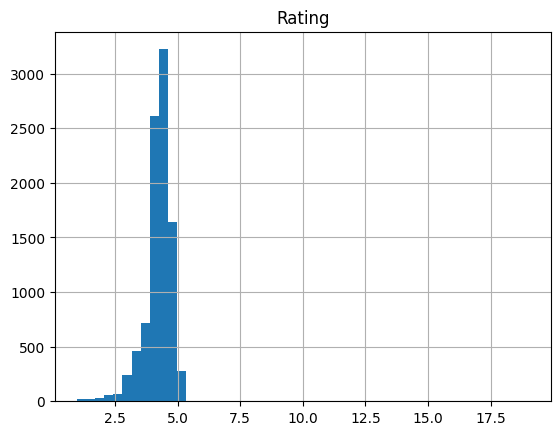

In [11]:
googleplaystore.hist(bins=50)
plt.show()

Karena hanya terdapat 1 data numerik, maka hanya dapat dilihat informasi distribusi data dari fitur Rating saja.

In [12]:
googleplaystore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Berdasarkan informasi tersebut dapat diketahui bahwa nilai maksimum rating adalah 19 dan nilai minimumnya adalah 0. Artinya, skala rating berkisar antara 0 hingga 2.

Sampai di tahap ini, variabel-variabel pada data telah cukup baik dapat dipahami.

# **Data Preparation**

Permasalah-permasalahn umum yang perlu diatasi pada data antara lain data outlier, data duplikat, dan data missing. Pada proyek ini atasi masalah-masalah ini dengan teknik dropping.

## **a. Mengatasi Outlier**

Visualisasikan outlier dengan boxplot

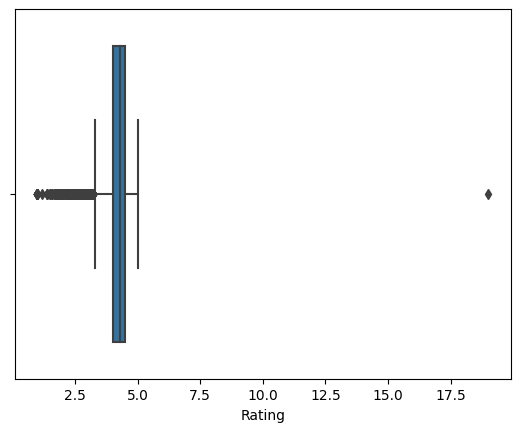

In [13]:
googleplaystore1=googleplaystore.select_dtypes(exclude=['object'])
for column in googleplaystore1:
        plt.figure()
        sns.boxplot(data=googleplaystore1, x=column)

Cek unique data untuk melihat dimana outlier berada

In [14]:
googleplaystore['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

Tampikan data outlier

In [15]:
googleplaystore[googleplaystore['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Karena hanya terdapat 1 data outlier maka solusi yang dapat dilakukan adalah drop data outlier tersebut

In [16]:
googleplaystore.drop(googleplaystore.index[10472], axis=0, inplace=True)

## **b. Mengatasi Data Duplikat**

Cek data duplikat

In [17]:
googleplaystore.duplicated().sum()

483

Drop data duplikat

In [18]:
googleplaystore.drop_duplicates(inplace=True)
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **c. Mengatasi Missing Value**

Cek missing value

In [19]:
googleplaystore.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Visualisasikan missing value

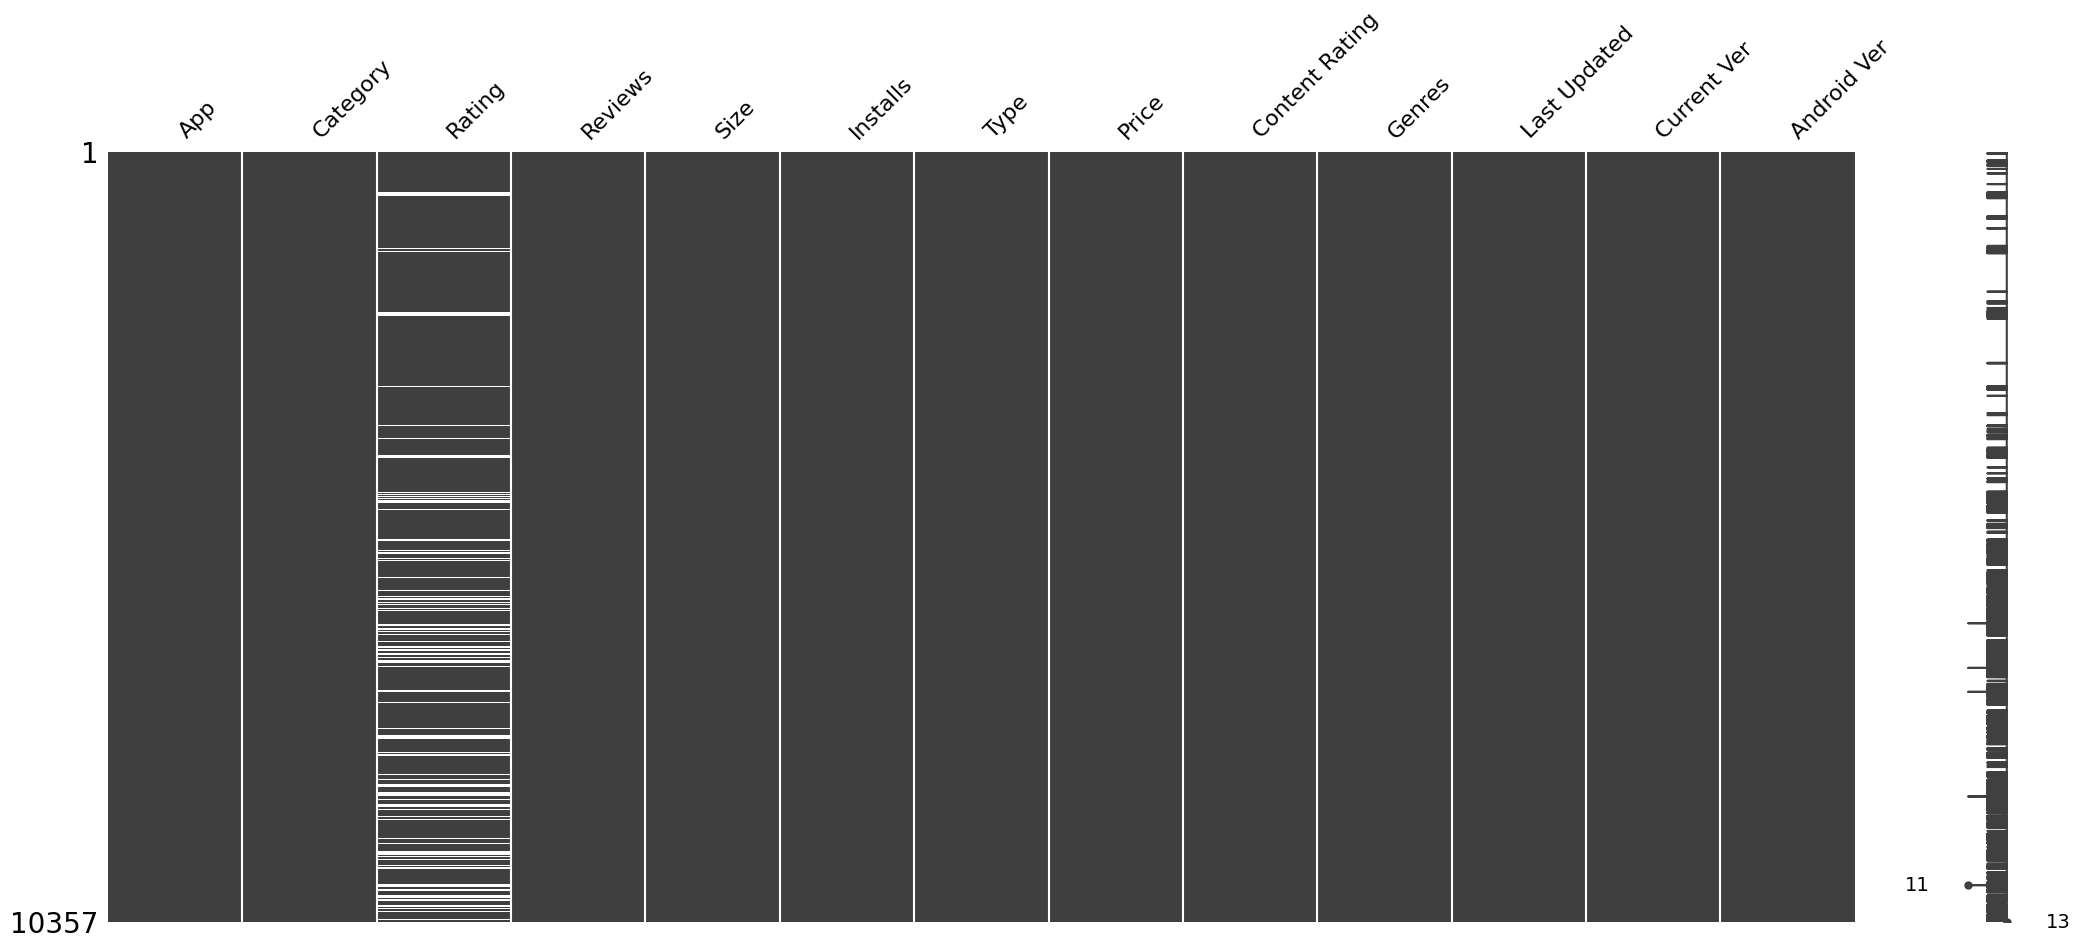

In [20]:
sorted_null = msno.nullity_sort(googleplaystore)
figures = msno.matrix(sorted_null)

Karena terdapat 1465 data null pada fitur Rating yang akan digunakan, maka dapat lakukan dropping

In [21]:
# Membersihkan missing value dengan fungsi dropna()
googleplaystore = googleplaystore.dropna()
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


Perhatikanlah, data sekarang sudah bersih. Tidak ada lagi outlier, data duplikat, dan data missing.

Selanjutnya olah dataset agar dapat diproses untuk membuat sistem rekomendasi.

## **d. Reduksi Fitur**

Sebelum, dibuat model beberapa fitur bisa dielminiasi. Pada proyek ini Current Ver dan Lat Updated dieliminasi karena tidak terlalu diperlukan dalam pembuatan model rekomendasi.

In [22]:
googleplaystore.drop(['Current Ver',	'Last Updated'], inplace=True,axis=1)
googleplaystore.head()

<ipython-input-22-e13dc4226c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googleplaystore.drop(['Current Ver',	'Last Updated'], inplace=True,axis=1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up


# **Modeling and Result**

Pada proses modeling, diujicobakan dua buah model, yaitu Cosine Similarity dan K-Nearest Neighbor

## **A. Model Cosine Similarity**



Teknik ini digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori. Pada model Content Based Filtering menggunakan Cosine Similarity, model bisa di-filter berdasarkan fitur yang dipilih. Pada proyek ini, diujicobakan beberapa filter, diantaranya:
- Model Content Based Filtering (dengan Filter Genre)
- Model Content Based Filtering (dengan Filter Type)
- Model Content Based Filtering (dengan Filter Content Rating)

### a. Model Content Based Filtering (dengan Filter Genre)

Pertama-tama, ekstrak fitur dari kategori yang dipilih dengan TF-IDF Vectorizer

In [23]:
# Inisialisasi TfidfVectorizer
tfid = TfidfVectorizer()

# Hitung idf pada kategori yang dipilih
tfid.fit(googleplaystore['Genres'])

# Mapping array dari fitur index integer ke fitur nama
tfid.get_feature_names_out()

array(['action', 'adventure', 'arcade', 'art', 'audio', 'auto', 'beauty',
       'board', 'books', 'brain', 'business', 'card', 'casino', 'casual',
       'comics', 'communication', 'creativity', 'dating', 'demo',
       'design', 'drink', 'editors', 'education', 'educational',
       'entertainment', 'events', 'finance', 'fitness', 'food', 'games',
       'health', 'home', 'house', 'libraries', 'lifestyle', 'local',
       'magazines', 'maps', 'medical', 'music', 'navigation', 'news',
       'parenting', 'personalization', 'photography', 'play', 'players',
       'playing', 'pretend', 'productivity', 'puzzle', 'racing',
       'reference', 'role', 'shopping', 'simulation', 'social', 'sports',
       'strategy', 'tools', 'travel', 'trivia', 'vehicles', 'video',
       'weather', 'word'], dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [24]:
# Melakukan fit lalu transformasikan ke bentuk matrix
tfidf_matrix = tfid.fit_transform(googleplaystore['Genres'])

# Cek ukuran matrix tfidf
tfidf_matrix.shape

(8886, 66)

Perhatikanlah, matriks memiliki berukuran (8886, 66). Nilai 8886 merupakan ukuran data dan 22 merupakan matrik kategori yang dipilih

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, gunakan fungsi todense().

In [25]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, lihat matriks tf-idf untuk nama App terhadap kategori yang dipilih




In [26]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=googleplaystore.Genres
).sample(22, axis=1).sample(10, axis=0)

,magazines,casual,educational,food,productivity,entertainment,role,music,photography,personalization,...,creativity,weather,fitness,trivia,house,board,card,adventure,video,casino
Genres,,,,,,,,,,,,,,,,,,,,,
Comics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arcade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lifestyle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Simulation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maps & Navigation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dating,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Entertainment,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Finance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Output matriks tf-idf di atas menunjukkan hubungan antara nama App terhadap kategori yang dipilih. Matriks ini menunjukkan seberapa besar korelasi antara nama App terhadap kategori yang dipilih.

Selanjutnya, untuk membangun sitem rekomendasi, perlu dilakukan perhitungan derajat kesamaan antara nama App satu dengan nama App lainnya untuk menghasilkan kandidat nama App yang akan direkomendasikan.

a. Cosine Similarity

In [27]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.71961846, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71961846, 1.        , 0.71961846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.71961846, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya, lihat matriks kesamaan setiap App dengan menampilkan nama App dalam 5 sampel kolom (axis = 1) dan 5 sampel baris (axis=0).

In [28]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=googleplaystore['App'], columns=googleplaystore['App'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (8886, 8886)


App,meStudying: AP English Lit,Opera Browser: Fast and Secure,Teenage Chat & Dating,"100000+ Messages - DP, Status, Jokes & GIF 2018",NYTimes - Latest News
App,,,,,
AH Alarm Panel,0.0,0.0,0.0,0.0,0.0
Business Dictionary,0.0,0.0,0.0,0.0,0.0
EF-myHR,0.0,0.0,0.0,0.0,0.0
Let's Learn Alif Ba Ta,1.0,0.0,0.0,0.0,0.0
H!LooK - Dating,0.0,0.0,1.0,0.0,0.0


Dengan cosine similarity, dapat diidentifikasi kesamaan antara satu App dengan App lainnya. Shape (8886, 8886) merupakan ukuran matriks similarity dari data yang dimiliki. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 8886 App x 8886 App (masing-masing dalam sumbu X dan Y). Artinya, model mengidentifikasi tingkat kesamaan pada 8886 App.Model yang dibangun dapat menampilkan rekomendasi sejumlah N App serupa.

Nah, dengan data kesamaan (similarity), dapat direkomendasikan daftar App yang mirip (similar) dengan App yang sebelumnya pernah digunakan pengguna.

 Selanjutnya buat sejumlah top-N recommendation App pada pengguna yang diatur dalam parameter k.

In [29]:
def app_recommendations(app_name, similarity_data=cosine_sim_df, items=googleplaystore[['App', 'Genres']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,app_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Perhatikanlah, dengan menggunakan argpartition, diambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, ambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest.

Selanjutnya, terapkan kode untuk menemukan rekomendasi yang mirip dengan App yang pernah digunakan pengguna

In [30]:
googleplaystore[googleplaystore.App.eq('EF Spelling Bee')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
9287,EF Spelling Bee,FAMILY,3.0,2,9.4M,500+,Free,0,Everyone,Education;Education,4.3 and up


Terakhir, dapatkan nama App recommendation dengan memanggil fungsi yang telah didefinisikan sebelumnya:

In [31]:
# Mendapatkan rekomendasi yang mirip
app_recommendations('EF Spelling Bee')

,App,Genres
0,Timetable,Education
1,British Columbia License,Education
2,Starfall Free & Member,Education;Education
3,AP Calculus BC Practice Test,Education
4,Wifi BT Scanner,Education


Sistem berhasil memberikan rekomendasi 5 nama App dengan kategori 'Genres' Education yang mirip dengan App yang sebelumnya pernah digunakan oleh pengguna. Model ini bisa disesuai dengan mengganti filter lainnya, seperti Type dan Content Rating.

### b. Model Content Based Filtering (dengan Filter Type)

Selanjut, ujicobakan model menggunakan filter yang berbeda. Dalam hal ini diujicobakan filter Type.

In [32]:
tfid = TfidfVectorizer()
tfid.fit(googleplaystore['Type'])
tfid.get_feature_names_out()
tfidf_matrix = tfid.fit_transform(googleplaystore['Type'])
tfidf_matrix.todense()
cosine_sim = cosine_similarity(tfidf_matrix)

def app_recommendations(app_name, similarity_data=cosine_sim_df, items=googleplaystore[['App', 'Type']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,app_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


In [33]:
app_recommendations('EF Spelling Bee')

,App,Type
0,Timetable,Free
1,British Columbia License,Free
2,Starfall Free & Member,Free
3,AP Calculus BC Practice Test,Free
4,Wifi BT Scanner,Free


Model ini berhasil membantu pengguna mendapatkan aplikasi serupa dengan Type Free/gratis.

### c. Model Content Based Filtering (dengan Filter Content Rating)

Selanjut, ujicobakan model menggunakan filter lainnya. Dalam hal ini diujicobakan filter Content Rating.

In [34]:
tfid = TfidfVectorizer()
tfid.fit(googleplaystore['Content Rating'])
tfid.get_feature_names_out()
tfidf_matrix = tfid.fit_transform(googleplaystore['Content Rating'])
tfidf_matrix.todense()
cosine_sim = cosine_similarity(tfidf_matrix)

def app_recommendations(app_name, similarity_data=cosine_sim_df, items=googleplaystore[['App', 'Content Rating']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,app_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [35]:
app_recommendations('EF Spelling Bee')

,App,Content Rating
0,Timetable,Everyone
1,British Columbia License,Everyone
2,Starfall Free & Member,Everyone
3,AP Calculus BC Practice Test,Everyone
4,Wifi BT Scanner,Everyone


Model ini berhasil membantu pengguna mendapatkan aplikasi serupa dengan Content Rating yang diharap pengguna

Untuk percobaan lebih lanjut, filter diganti dengan fitur lainnya untuk bisa disesuaikan dengan kebutuhan

## **B. Model K-Nearest Neighbor**

Untuk algoritma lainnya yang diujicobakan adalah menggunakan K-Nearest Neighbor (KNN). KNN merupakan sebuah metode untuk melakukan klasifikasi terhadap data berdasarkan nilai pemelajaran yang jaraknya paling dekat dengan data tersebut

Hal pertama yang perlu dilakukan adalah memilih index data yang ingin dicari kesamaannya. Dalam hal ini, dipilih fitur App.

In [36]:
# Menyimpan nama-nama aplikasi pada dataframe baru
app_name = pd.DataFrame({'App':googleplaystore['App']})
app_name.head()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book


Kemudian drop fitur-fitur yang tidak dibutuhkan dalam pembuatan model. Dalam model ini. fitur 'Type',	'Content Rating',	'Genres',	'Android Ver; dieliminasi.

In [37]:
googleplaystore.drop(['Type',	'Content Rating',	'Genres',	'Android Ver'], inplace=True,axis=1)
googleplaystore.head()

<ipython-input-37-84b0727eb863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googleplaystore.drop(['Type',	'Content Rating',	'Genres',	'Android Ver'], inplace=True,axis=1)


,App,Category,Rating,Reviews,Size,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0


Selanjutnya ubah indeks yang sebelumnya merupakan indeks 0-n menjadi app_name

In [38]:
# Menggunakan kolom aplikasi sebagai index
googleplaystore.set_index('App',inplace=True)
googleplaystore.head()

,Category,Rating,Reviews,Size,Installs,Price
App,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0


Selnjutnya, lakukan encoding pada fitur Category agar fitur non-numerik ini menjadi sebuah vektor biner dengan nilai 1 pada kategori yang sesuai dan 0 untuk kategori lainnya.  Salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Lakukan proses encoding ini dengan fitur get_dummies.

In [39]:
googleplaystore = pd.concat([googleplaystore, pd.get_dummies(googleplaystore['Category'], prefix='Category')],axis=1)
googleplaystore.drop(['Category'], axis=1, inplace=True)
googleplaystore.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coloring book moana,3.9,967,14M,"500,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7M,"5,000,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Selanjutnya, sebelum data dimodelkan, sesuaikan data melakukan replace string dan mengubah tipe data agar bisa di-scaling. Dalam hal ini sesuaikan data pada kolom 'Size', 'Installs', dan 'Price'.

In [40]:
googleplaystore['Size']= googleplaystore['Size'].str.replace('M','000')
googleplaystore['Size'] = googleplaystore['Size'].str.replace('k','')
googleplaystore['Size'] = googleplaystore['Size'].replace("Varies with device",'0')
googleplaystore['Size'] = googleplaystore['Size'].astype('float')
for item in googleplaystore['Size']:
  if item < 10:
      googleplaystore['Size'] = googleplaystore['Size'].replace(item, item*1000)
googleplaystore['Size'] = googleplaystore['Size']/1000


googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+', '')
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace(',', '')
googleplaystore['Installs'] = googleplaystore['Installs'].astype('int')


googleplaystore['Price'] = googleplaystore['Price'].str.replace('$', '')
googleplaystore['Price'] = googleplaystore['Price'].astype('float')

<ipython-input-40-cffd4984639e>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+', '')
<ipython-input-40-cffd4984639e>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplaystore['Price'] = googleplaystore['Price'].str.replace('$', '')


Lakukan scaling. Scaling merupakan salah satu teknik pada normalisasi data agar variabel dengan rentang nilai yang luas menjadi nilai yang memiliki rentang yang sama. Pada model ini digunakan metode normalisasi min-max yang mengubah sebuah kumpulan data menjadi skala mulai dari 0 (min) hingga 1 (max)

In [41]:
column_numeric = ['Reviews', 'Installs', 'Rating', 'Size', 'Price']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(googleplaystore[column_numeric])

i=0
for column in column_numeric:
    googleplaystore[column] = scaled[:,i]
    i += 1

googleplaystore.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.000002,0.190,0.00001,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coloring book moana,0.725,0.000012,0.140,0.00050,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.001120,0.087,0.00500,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sketch - Draw & Paint,0.875,0.002759,0.250,0.05000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,0.825,0.000012,0.028,0.00010,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Selanjutnya buat model menggunakan NearestNeighbors dengan metric pemebelajaran kedekatan antar data menggunakan 'euclidean'

In [42]:
model = NearestNeighbors(metric='euclidean')
model.fit(googleplaystore)

NearestNeighbors(metric='euclidean')

Selanjutnya buat fungsi rekomendasi dengan menghitung skor distance

In [43]:
def RecommendedApps_model(appname:str, recommend_apps:int=5):
  print(f'Apabila pengguna menyukai aplikasi... {appname[0]}\Berikut ini adalah aplikasi yang juga mungkin akan disukai :')
  distances, neighbors = model.kneighbors(googleplaystore.loc[appname],n_neighbors=recommend_apps)
  similar_app = []
  for appname in app_name.loc[neighbors[0][:]].values:
    similar_app.append(appname[0])
  similar_distance = []
  for distance in distances[0]:
    similar_distance.append(f"{round(100-distance, 2)}%")
  return pd.DataFrame(data = {"App Name" : similar_app, "Similiarity Score" : similar_distance})

In [45]:
# Memberikan rekomendasi terhadap aplikasi yang
# Serupa dengan Natural recipes for your beauty
RecommendedApps_model(app_name.loc[100])

Apabila pengguna menyukai aplikasi... Natural recipes for your beauty\Berikut ini adalah aplikasi yang juga mungkin akan disukai :


,App Name,Similiarity Score
0,Hush - Beauty for Everyone,100.0%
1,Hairstyles step by step,99.99%
2,Tie - Always be happy,99.97%
3,Girls Hairstyles,99.96%
4,Mirror - Zoom & Exposure -,99.95%


# **Evaluation**

### **a. Precission**

Precision digunakan untuk mengukur kinerja sistem. Precision adalah tingkat ketepatan antara informasi yang diminta oleh pengguna dengan jawaban yang diberikan oleh sistem

Untuk sistem rekomendasi, presisi diukur dengan menggunakan rumusan berikut

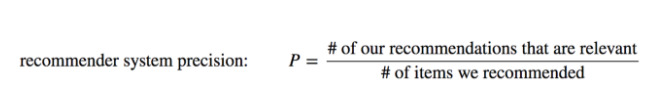

Berdasarkan hasil ujicoba pada model Content Base Filtering  menggunakan Filter Genre, Type, dan Conteng Rating didapatkan bahwa 5/5 hasil rekomendasi memiliki jenis Genre, Type, dan Content Rating yang serupa dengan aplikasi yang sebelumnya digunakan oleh pengguna. Dengan demikian Top-5 Reccomender System yang dibangun memiliki presisi sebesar 5/5 = 100%

### **b. Calinski Harabasz Score**

Calinski-Harabasz (CH) merupakan salah satu metrik evaluasi algoritma pengelompokan.  Metrik ini menghitung rasio dari jumlah dispersi antar cluster dan dari penyebaran antar cluster. Semakin tinggi skor CH maka kluster terpisah dengan lebih baik.

In [46]:
calinski_harabasz_score(googleplaystore, app_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7.4998974132315315

Pada model ini, nampak bahwa kluster masih belum terpisahkan dengan baik karena nilai skornya masih cukup rendah. Hal ini memungkinkan adanya rekomendasi pada beberapa aplikasi yang tidak sesuai dengan aplikasi yang disukai pengguna.

### **c. Davies Bouldin Score**

Davies-Bouldin (DB) juga merupakan salah satu metrik evaluasi algoritma pengelompokan. Metrik ini menghitung rata-rata nilai setiap titik pada himpunan data. Skor rendah mengindikasikan bahwa separasi tiap kluster di model terpisahkan dengan baik.

In [47]:
davies_bouldin_score(googleplaystore, app_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.585735926526135

Hasil evaluasi DB menunjukkan bahwa model ini memiliki skor yang relatif cukup kecil. Hal ini menandakan bahwa model sudah memiliki separasi kluster yang cukup baik. Hal ini terbukti dengan hasil rekomendasi aplikasi yang sudah cukup baik.